In [1]:
from fastai.collab import *
from fastai.tabular import *
path = Path("/home/sloth/datasets/anime/anime-recommendations-database")

In [2]:
anime = pd.read_csv(path/"anime_clean.csv")
rating = pd.read_csv(path/"rating_clean.csv")

In [4]:
anime.head()

,anime_id,name,episodes,avg_rating,members,g0,g1,g2,g3,g4,...,g40,g41,g42,Movie,TV,OVA,Special,Music,ONA,Other
0,32281,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,28977,Gintama°,51,9.25,114262,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9969,Gintama&#039;,51,9.16,151266,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
rating.head()

,user_id,anime_id,user_rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10


In [3]:
anime_rating = anime.merge(rating, on="anime_id")
anime_rating.head()

,anime_id,name,episodes,avg_rating,members,g0,g1,g2,g3,g4,...,g42,Movie,TV,OVA,Special,Music,ONA,Other,user_id,user_rating
0,32281,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,...,0,1,0,0,0,0,0,0,99,5
1,32281,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,...,0,1,0,0,0,0,0,0,152,10
2,32281,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,...,0,1,0,0,0,0,0,0,244,10
3,32281,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,...,0,1,0,0,0,0,0,0,271,10
4,32281,Kimi no Na wa.,1,9.37,200630,1,1,1,1,0,...,0,1,0,0,0,0,0,0,322,10


In [4]:
data = CollabDataBunch.from_df(anime_rating, seed=42, valid_pct=0.1, user_name="user_id", item_name="name", rating_name="user_rating",bs=512)

In [5]:
data.show_batch()

user_id,name,target
9575,Acchi Kocchi (TV),9.0
70998,Love Live! School Idol Project,9.0
20493,Gyakkyou Burai Kaiji: Ultimate Survivor,7.0
47282,Fractale,7.0
53852,K-On!: Live House!,8.0


In [6]:
y_range = [0.5,10.5]

In [7]:
torch.cuda.empty_cache()

In [8]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1, metrics=[root_mean_squared_error, mean_squared_error])

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


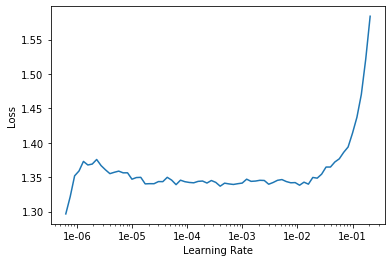

In [13]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [14]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,time
0,1.312153,1.382892,1.174865,1.382892,00:54
1,1.333844,1.380175,1.173707,1.380175,00:51
2,1.330499,1.378070,1.172811,1.378069,00:52
3,1.327017,1.377049,1.172376,1.377049,00:52
4,1.312212,1.376896,1.172310,1.376895,00:52
